In [1]:
%matplotlib inline


import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import mnist

Using TensorFlow backend.


In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


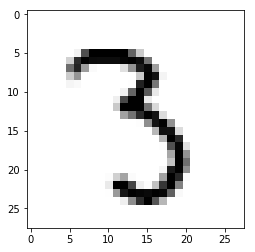

In [4]:
plt.imshow(x_train[8888],cmap='Greys')

In [5]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [6]:
from keras.utils import np_utils

In [7]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [8]:
from keras.models import Model
from keras.layers import Input
from keras.layers import concatenate, add, Dense

In [22]:
f_1 = Dense(100, activation='relu')
f_2 = Dense(50, activation='relu')
f_3 = Dense(20, activation='relu')
f_4 = Dense(10, activation='softmax')

In [10]:
print(f_1, f_3)

<keras.layers.core.Dense object at 0x000002667FB77668> <keras.layers.core.Dense object at 0x000002667FBB2780>


In [11]:
x = Input(shape=(784,))

In [12]:
h_1 = f_1(x)
h_2 = f_2(h_1)
h_3 = f_3(h_2)
y = f_4(h_3)

Instructions for updating:
Colocations handled automatically by placer.


In [13]:
print(h_1)
print(h_2)
print(h_3)
print(y)

Tensor("dense_1/Relu:0", shape=(?, 100), dtype=float32)
Tensor("dense_2/Relu:0", shape=(?, 50), dtype=float32)
Tensor("dense_3/Relu:0", shape=(?, 20), dtype=float32)
Tensor("dense_4/Softmax:0", shape=(?, 10), dtype=float32)


In [14]:
model = Model(x, y)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_3 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                210       
Total params: 84,780
Trainable params: 84,780
Non-trainable params: 0
_________________________________________________________________


In [15]:
f_5 = Dense(20, activation='sigmoid')
z = f_5(h_1)
f_4 = Dense(10, activation='softmax')

In [16]:
u = concatenate([h_3, z])
y = f_4(u)

In [17]:
print(u)
print(y)

Tensor("concatenate_1/concat:0", shape=(?, 40), dtype=float32)
Tensor("dense_6/Softmax:0", shape=(?, 10), dtype=float32)


In [18]:
model = Model(x, y)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 784)          0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 100)          78500       input_1[0][0]                    
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 50)           5050        dense_1[0][0]                    
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 20)           1020        dense_2[0][0]                    
__________________________________________________________________________________________________
dense_5 (D

In [19]:
from keras.optimizers import SGD

In [20]:
model.compile(loss='mse', optimizer=SGD(lr=0.001), metrics=['accuracy'])

In [23]:
model.fit(x_train, y_train, batch_size=100, epochs=100)

Epoch 1/100
60000/60000 [==============================] - 2s 27us/step - loss: 0.0404 - acc: 0.7308
Epoch 2/100
60000/60000 [==============================] - 2s 26us/step - loss: 0.0401 - acc: 0.7330
Epoch 3/100
60000/60000 [==============================] - 2s 26us/step - loss: 0.0398 - acc: 0.7363
Epoch 4/100
60000/60000 [==============================] - 2s 26us/step - loss: 0.0396 - acc: 0.7388
Epoch 5/100
60000/60000 [==============================] - 2s 26us/step - loss: 0.0393 - acc: 0.7411
Epoch 6/100
60000/60000 [==============================] - 2s 25us/step - loss: 0.0391 - acc: 0.7435
Epoch 7/100
60000/60000 [==============================] - 2s 25us/step - loss: 0.0389 - acc: 0.7454
Epoch 8/100
60000/60000 [==============================] - 2s 25us/step - loss: 0.0386 - acc: 0.7481
Epoch 9/100
60000/60000 [==============================] - 2s 25us/step - loss: 0.0384 - acc: 0.7497
Epoch 10/100
60000/60000 [==============================] - 2s 26us/step - loss: 0.0382 - a

60000/60000 [==============================] - 2s 28us/step - loss: 0.0264 - acc: 0.8473
Epoch 82/100
60000/60000 [==============================] - 2s 30us/step - loss: 0.0263 - acc: 0.8487
Epoch 83/100
60000/60000 [==============================] - 2s 29us/step - loss: 0.0261 - acc: 0.8498
Epoch 84/100
60000/60000 [==============================] - 2s 30us/step - loss: 0.0259 - acc: 0.8515
Epoch 85/100
60000/60000 [==============================] - 2s 29us/step - loss: 0.0257 - acc: 0.8526
Epoch 86/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.0255 - acc: 0.8541
Epoch 87/100
60000/60000 [==============================] - 2s 29us/step - loss: 0.0254 - acc: 0.8553
Epoch 88/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.0252 - acc: 0.8568
Epoch 89/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.0250 - acc: 0.8582
Epoch 90/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.0249 - acc: 

In [24]:
score = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 36us/step


In [25]:
print('loss:', score[0])
print('正確率', score[1])

loss: 0.024105861628055572
正確率 0.8638


In [26]:
model_json = model.to_json()
open('API_best_model.json', 'w').write(model_json)
model.save_weights('API_best_model_weights.h5')